<a href="https://colab.research.google.com/github/sangeeta97/new-page-stes/blob/main/plantcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plantcv==4.2.1


In [ ]:
!pip install altair==5.3.0

In [ ]:
import altair

In [ ]:
!pip install numpy

In [ ]:
from plantcv.plantcv.hyperspectral.read_data import _find_closest
from plantcv.plantcv.hyperspectral.read_data import _make_pseudo_rgb
from plantcv.plantcv.hyperspectral.read_data import read_data
from plantcv.plantcv.hyperspectral.extract_wavelength import extract_wavelength
from plantcv.plantcv.hyperspectral.calibrate import calibrate
from plantcv.plantcv.hyperspectral._avg_reflectance import _avg_reflectance
from plantcv.plantcv.hyperspectral._inverse_covariance import _inverse_covariance
from plantcv.plantcv.hyperspectral.rot90 import rot90
from plantcv.plantcv.hyperspectral.write_data import write_data

In [ ]:
from plantcv import plantcv as pcv


In [ ]:
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import numpy as np

In [ ]:
import os

In [ ]:
args = WorkflowInputs(
    images=[os.path.abspath("31_2.png")],
    names="image1",
    result="hyperspectral_result",
    outdir=".",
    writeimg=True,
    debug="plot"
    )

In [ ]:
# Set debug to the global parameter
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

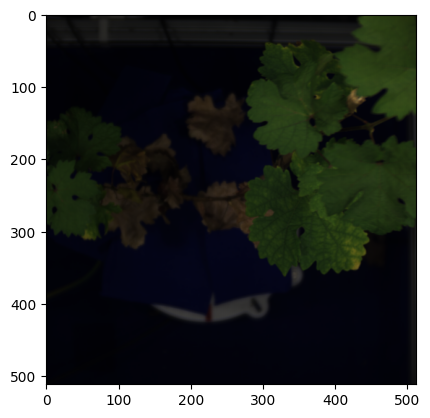

In [ ]:
# read hyperspectral image. With the ENVI format the input file should be a .raw.
#If you were using a differen format the filename should be a .hdr file that includes information for shaping data (see readimage instructions)
img, path, filename = pcv.readimage(filename= os.path.abspath("31_2.png"))

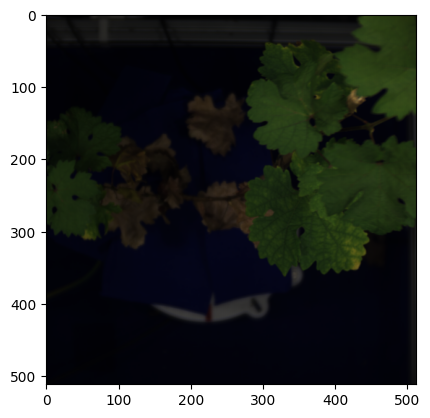

In [ ]:
# Crop image if necessary. This is optional.
crop_img = pcv.crop(img=img, x=1500, y=0, h=2900, w=2500)

In [ ]:
# Update params related to plotting so we can see better
pcv.params.text_size=50
pcv.params.text_thickness=15


#Look at the colorspace - which of these looks the best for masking? Which channel makes the plant look most distinct?
colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

In [ ]:
#If you want to save your color corrected image, do so here. Do NOT save over your raw image.
#We are saving as a temporary image here becasue we want to use it for thresholding.

pcv.print_image(img, filename = "color_corrected_img_temp.png")

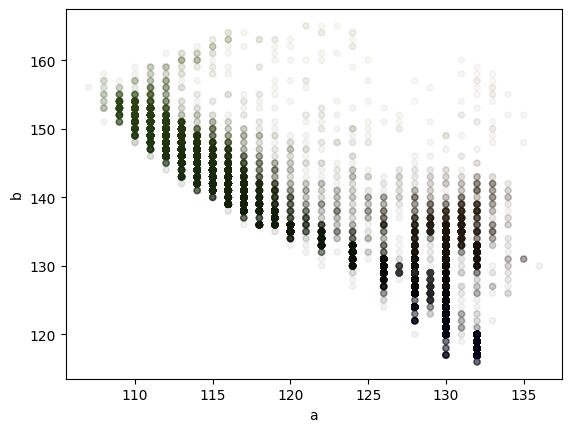

In [ ]:
#Visualize all the colors to make decisions on how to threshold. I picked the two channels from the colorspace above that looked distinct

color_scatter = pcv.visualize.pixel_scatter_plot(paths_to_imgs = ["color_corrected_img_temp.png"] , x_channel = "a", y_channel ="b" )

In [ ]:
#Threshold your image by choosing points in the plot that will separate the green plant pixels from everything else.
# It will draw a line between your two points and take every pixel "above" (if set to true). Do you get all of the plant?

thresh1 = pcv.threshold.dual_channels(rgb_img = img, x_channel = "a", y_channel = "b", points = [(80,80),(125,140)], above=True)

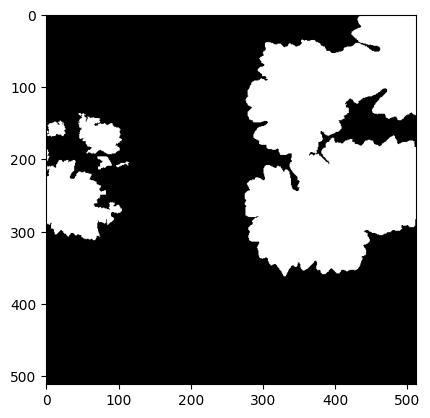

In [ ]:
# Fill in small objects if the above threshold looks like there are "holes" in the leaves
a_fill_image = pcv.fill(bin_img=thresh1, size=50)
a_fill_image = pcv.fill_holes(a_fill_image)

pcv.plot_image(a_fill_image)

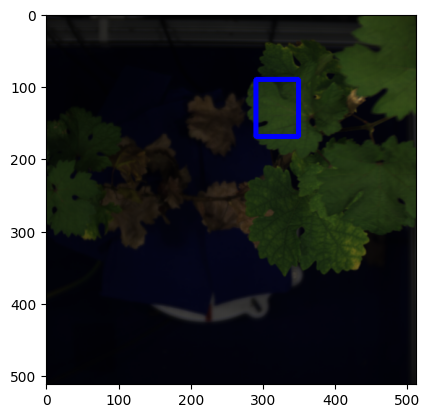

In [ ]:
# Define the region of interest (ROI). This should include your plant, but not you color card or other things.

# Inputs:
#   img - RGB or grayscale image to plot the ROI on
#   x - The x-coordinate of the upper left corner of the rectangle
#   y - The y-coordinate of the upper left corner of the rectangle
#   h - The height of the rectangle
#   w - The width of the rectangle

pcv.params.debug = "plot"

roi1 = pcv.roi.rectangle(img=img, x=290, y=90, h=80, w=60)

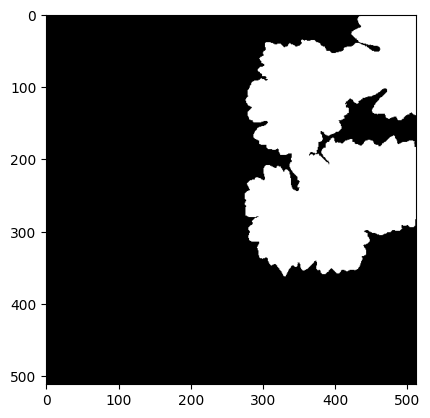

In [ ]:
# Make a new filtered mask that only keeps the plant in your ROI and not objects outside of the ROI
# We have set to partial here so that if a leaf extends outside of your ROI it will still be selected. Switch to "cutto" if you have other plants that are getting selected on accident

# Inputs:
#    mask            = the clean mask you made above
#    roi            = the region of interest you specified above
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or
#                     'largest' (keep only largest contour)

kept_mask  = pcv.roi.filter(mask=a_fill_image, roi=roi1, roi_type='partial')

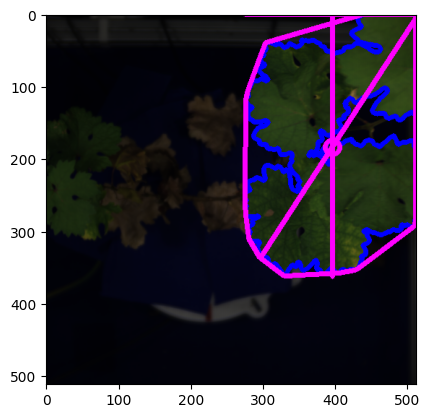

In [ ]:
############### Analysis ################

# Find shape properties, data gets stored to an Outputs class automatically

# Inputs:
#   img - RGB or grayscale image data
#   labeled_mask - the mask of each individual object, set by the create_labels function.
#   n_labels - the number of objects, set by the create_labels function.

analysis_image = pcv.analyze.size(img=img, labeled_mask=kept_mask)

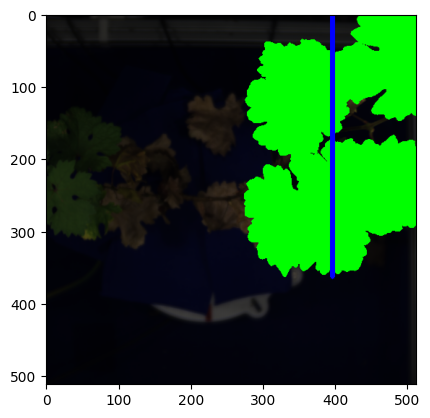

In [ ]:
# Shape properties relative to user boundary line (optional). This is useful if your plant is hanging below the pot and you want height from the top of the pot.
# Set your line_position by finding the x-value at the top of the pot, hover your cursor to get that value

# Inputs:
#   img - RGB or grayscale image data
#   obj - Single or grouped contour object
#   mask - Binary mask of selected contours
#   line_position - Position of boundary line (a value of 0 would draw a line
#                   through the bottom of the image)
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

boundary_image = pcv.analyze.bound_horizontal(img=img,labeled_mask=kept_mask,
                                               line_position=2380, label="default")

In [ ]:
# Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)

# Inputs:
#   rgb_img - RGB image data
#   mask - Binary mask of selected contours
#   colorspaces - 'all' (default), 'rgb', 'lab', or 'hsv'
#                 This is the data to be printed to the SVG histogram file
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)

color_histogram = pcv.analyze.color(rgb_img=img, labeled_mask=kept_mask, colorspaces='all', label="default")

alt.FacetChart(...)

In [ ]:
args = WorkflowInputs(
    images=[os.path.abspath("WHITEDARKREF_31.raw")],
    names="image1",
    result="hyperspectral_result",
    outdir=".",
    writeimg=True,
    debug="plot"
    )

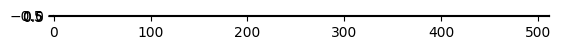

In [ ]:
# read hyperspectral image. With the ENVI format the input file should be a .raw.
#If you were using a differen format the filename should be a .hdr file that includes information for shaping data (see readimage instructions)
spectral_array = pcv.readimage(filename=args.image1, mode='envi')

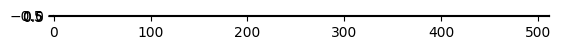

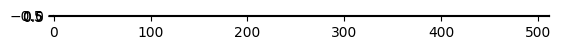

In [ ]:
white_img= "/content/WHITEREF.raw"
dark_img= "/content/DARKREF.raw"

white_ref = pcv.readimage(filename= white_img, mode='envi')
dark_ref= pcv.readimage(filename= dark_img, mode='envi')

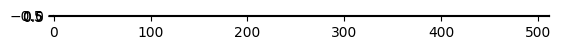

In [ ]:
# Calibrate data to white and dark references

calibrated_data = pcv.hyperspectral.calibrate(raw_data=spectral_array, white_reference=white_ref, dark_reference=dark_ref)

/usr/local/lib/python3.10/dist-packages/plantcv/plantcv/spectral_index/spectral_index.py:548: RuntimeWarning: divide by zero encountered in true_divide
  index_array_raw = (r678 - r500) / r750
/usr/local/lib/python3.10/dist-packages/plantcv/plantcv/spectral_index/spectral_index.py:548: RuntimeWarning: invalid value encountered in true_divide
  index_array_raw = (r678 - r500) / r750


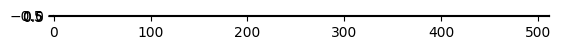

In [ ]:
# Calculate the Carotenoid Index from the datacube

index_array_car  = pcv.spectral_index.psri(hsi=calibrated_data, distance=5)

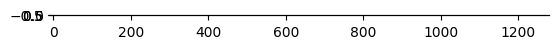

In [ ]:
#Next step is to segment the target object from the background pixels
#This step is just to aid in picking a changel with good constrast between the target object and background

colorspace_img = pcv.visualize.colorspaces(rgb_img=calibrated_data.pseudo_rgb)

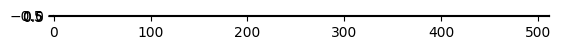

In [ ]:
#In this example the l channel from LAB colorspace looks like it has good contrast.
#Alternatively instead of using the pseudo_rgb image you could calculate an index from the hyperspectral values by
# using the 'pcv.spectral_index' function and finding an index that has good seperation between object and background
# then thresholding like this pipeline does

l = pcv.rgb2gray_lab(rgb_img=calibrated_data.pseudo_rgb, channel='l')

In [ ]:
#plot histogram of data to more easily select a threshold.
# Please note this step would not be included in a workflow when run in parallel

hist_figure1= pcv.visualize.histogram(l, bins=10)

alt.Chart(...)

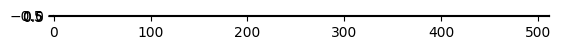

In [ ]:

# Select a threshold value that isolates your target object well. If necessary do additional steps to clean up the mask.

corn_thresh = pcv.threshold.binary(gray_img=l, threshold=100)

In [ ]:
# Look at a histogram of the hyperspectral data, if you had more than one object you would need a matrix with
# each object labeled with a different value.

spectral_hist  = pcv.analyze.spectral_reflectance(hsi=calibrated_data, labeled_mask=corn_thresh, n_labels=1, label="kernel")

alt.FacetChart(...)

/usr/local/lib/python3.10/dist-packages/plantcv/plantcv/spectral_index/spectral_index.py:39: RuntimeWarning: invalid value encountered in true_divide
  index_array_raw = (r800 - r670) / (r800 + r670)


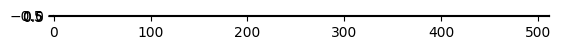

In [ ]:
# Calculate an index (many are available see plantcv.spectral_index)
# Or you can calculate your own manually by using plantcv.hyperspectral.extract_wavelength
ndvi_index  = pcv.spectral_index.ndvi(hsi=calibrated_data, distance=20)

In [ ]:
# Graph the histogram of the spectral index

ndvi_output=pcv.analyze.spectral_index(index_img=ndvi_index, labeled_mask=corn_thresh,
                           min_bin=-1, max_bin=1, label="kernel")

alt.FacetChart(...)

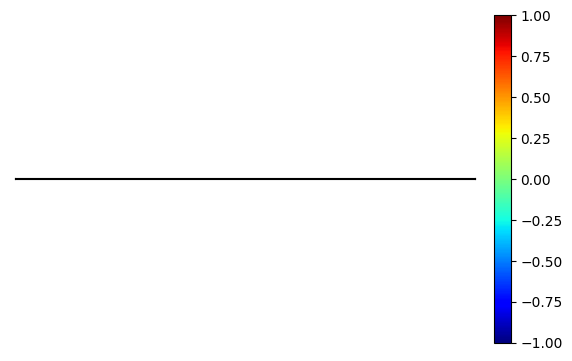

In [ ]:
# pseudocolor the image as a visualization

ndvi_img = pcv.visualize.pseudocolor(gray_img = ndvi_index.array_data, mask=corn_thresh, cmap='jet',
                                           min_value=-1, max_value=1)

/usr/local/lib/python3.10/dist-packages/plantcv/plantcv/spectral_index/spectral_index.py:154: RuntimeWarning: divide by zero encountered in true_divide
  index_array_raw = (1 / r550) - (1 / r700)
/usr/local/lib/python3.10/dist-packages/plantcv/plantcv/spectral_index/spectral_index.py:154: RuntimeWarning: invalid value encountered in subtract
  index_array_raw = (1 / r550) - (1 / r700)


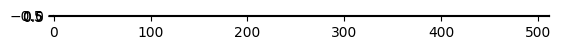

In [ ]:
# Calculate an index (many are available see plantcv.spectral_index)
# Or you can calculate your own manually by using plantcv.hyperspectral.extract_wavelength
ari_index  = pcv.spectral_index.ari(hsi=calibrated_data, distance=20)

In [ ]:
ari_img = pcv.visualize.pseudocolor(gray_img = ari_index.array_data, mask=corn_thresh, cmap='jet',
                                           min_value=-5, max_value=5)

In [ ]:
#Do shape analysis (the output image will look a little strange because the image is so small)

shape_image = pcv.analyze.size(img=calibrated_data.pseudo_rgb, labeled_mask=corn_thresh, n_labels=1, label="kernel")

#print out results just to see (this wouldn't be included in a workflow run in parallel)
area = pcv.outputs.observations['kernel1']['area']['value']
print(area)

38.0


In [ ]:
# Save out the results

pcv.outputs.save_results(filename =args.result, outformat = "csv" )